In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
path = '/Users/aryagupta/Desktop/Capstone Project/Data/processed/gurgaon_properties_outlier_treated.csv'

df = pd.read_csv(path)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1029
agePossession             0
super_built_up_area    1713
built_up_area          1975
carpet_area            1738
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

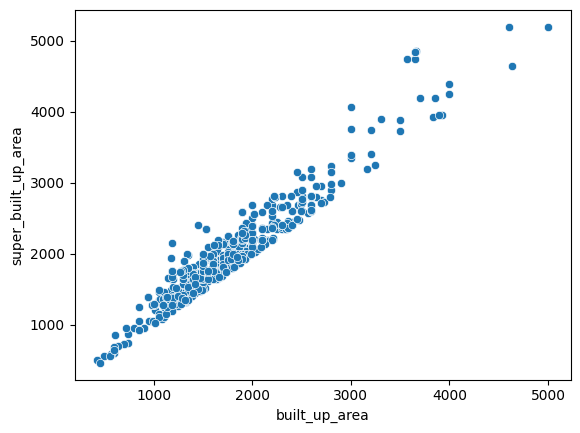

In [8]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

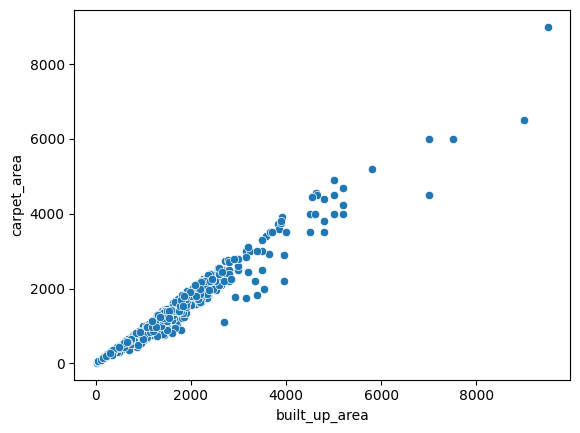

In [10]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [11]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3583    False
3584    False
3585    False
3586    False
3587    False
Length: 3588, dtype: bool

In [12]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [13]:
all_present_df.shape

(531, 23)

In [14]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [15]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [16]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159
39,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,0,49
41,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,2,26
46,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,0,146


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1029
agePossession             0
super_built_up_area    1713
built_up_area          1554
carpet_area            1738
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [22]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,1,49
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,0,95
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,0,165
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,0,101
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,1,60


In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df

In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1029
agePossession             0
super_built_up_area    1713
built_up_area           679
carpet_area            1738
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,0,52
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,2,174
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,1,49
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,0,0


In [29]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_ar

In [30]:
df.update(c_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1029
agePossession             0
super_built_up_area    1713
built_up_area             0
carpet_area            1738
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

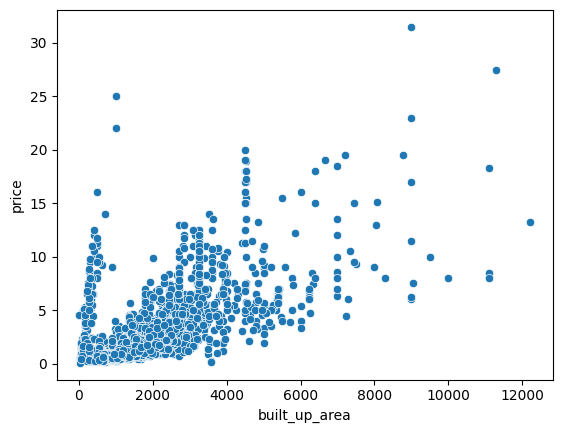

In [33]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [34]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [35]:
anamoly_df.sample(5)

,price,area,built_up_area
1698,4.49,3150.0,389.0
2225,3.15,2153.0,222.0
544,2.80,1650.0,1800.0
1809,3.75,1701.0,1701.0
1966,4.50,1350.0,1350.0


In [36]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

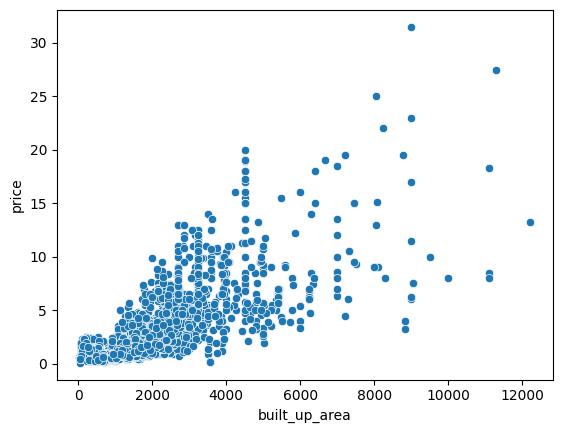

In [39]:
sns.scatterplot(x = df['built_up_area'], y =df['price'])

In [42]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [43]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'], axis = 1,inplace=True)

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,582.0,0,0,1,0,0,0,159


In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1029
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [46]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
505,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
774,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1303,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1462,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1475,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1967,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2069,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2178,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2294,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
2462,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130


In [47]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [48]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_2601/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [49]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1029
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [50]:
1011/df.shape[0]

0.2817725752508361

### facing

<Axes: ylabel='count'>

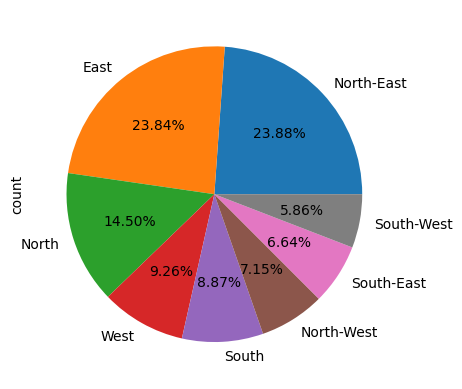

In [51]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [52]:
df.drop(columns=['facing'],inplace=True)

In [53]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1819,flat,shree vardhman flora,sector 90,0.96,5120.0,3,4,3,3.0,New Property,1697.0,0,1,0,0,0,0,106
2851,flat,bestech park view residency,sector 2,1.55,8073.0,3,4,3+,4.0,Old Property,1738.0,0,1,0,0,0,0,84
994,house,dlf the grove,sector 54,5.70,23457.0,4,4,0,1.0,Undefined,2430.0,0,0,0,0,0,0,46
2390,flat,hsiidc sidco shivalik apartments,manesar,0.48,3840.0,2,2,3,7.0,Moderately Old,993.0,0,0,0,0,0,0,88
1908,house,independent,sector 57,3.50,21605.0,4,4,3+,3.0,Old Property,1620.0,0,0,1,0,0,1,67


In [54]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [55]:
df.drop(index=[2536],inplace=True)

In [56]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1609
New Property           562
Moderately Old         551
Undefined              303
Old Property           298
Under Construction     264
Name: count, dtype: int64